## Matplotlib Challenge - Observations and Insights 

## <font color='red'>Grader the written observations are at the end of this file</font>

In [58]:
%matplotlib inline 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results.head()
# Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

# Combine the data into a single dataset
mice_data = mouse_metadata.merge(study_results, on='Mouse ID', how='outer')
# Display the data table for preview
mice_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [59]:
# Functions that will be used through out the program

# Function to gather data for a requested drug regimen and return a dataframe
# of the max timepoints for each mouse in the given regimen.
def get_drug_data(drug_name):
    # TODO Error check to make sure drug name passed is in the data
    drug_data = sorted_mice_data.loc[sorted_mice_data["Drug Regimen"] == drug_name]
    drug_max_time = pd.DataFrame(drug_data.groupby('Mouse ID').max()['Timepoint'])
    drug_merge = drug_max_time.merge(clean_mice_data, on=("Mouse ID", "Timepoint"), how="left")
    return drug_merge

# Function to return data for the box whisker plot
def get_drug_tumor_data(drug_name):
    tumor_vol = get_drug_data(drug_name)['Tumor Volume (mm3)']
    return tumor_vol

# Function to return a string of all statistical data for a given regimen.
def get_drug_stats(drug_name):
    tumor_vol = get_drug_tumor_data(drug_name)
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    drug_lowerq = quartiles[0.25]
    drug_upperq = quartiles[0.75]
    drug_iqr = drug_upperq - drug_lowerq
    drug_lower_bound = drug_lowerq - 1.5 * drug_iqr
    drug_upper_bound = drug_upperq + 1.5 * drug_iqr    
    return_string = "-------------------------\n"
    return_string += f"Statistical data for {drug_name}\n"
    return_string += f"\tIQR = {drug_iqr:.2f}\n"
    return_string += f"\tLower Quartile = {drug_lowerq:.2f}\n"
    return_string += f"\tUpper Quartile = {drug_upperq:.2f}\n"
    return_string += f"\tLower Bound: {drug_lower_bound:.2f}\n"
    return_string += f"\tUpper Bound: {drug_upper_bound:.2f}\n"
    return_string += f"\t{drug_name} potential outliers could be values below {drug_lower_bound:.2f} and above {drug_upper_bound:.2f} \n"
    return_string += "-------------------------\n"
    return return_string

In [60]:
# Checking the number of mice, total rows, and duplicate data.
tot_cnt = len(mice_data["Mouse ID"].unique())
print(f"Total number of mice: {tot_cnt}")

tot_rows = mice_data.shape[0]
print(f"Total number of rows: {tot_rows}")

tot_dups = mice_data.duplicated().sum()
print(f"Total number of duplicate mice: {tot_dups}")

Total number of mice: 249
Total number of rows: 1893
Total number of duplicate mice: 1


In [61]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = study_results.loc[study_results.duplicated(subset=['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
for dup_mouse in dup_mice:
    print(f"Duplicated mice ID: {dup_mouse}")


Duplicated mice ID: g989


In [62]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_data_list = []
for dup_mouse in dup_mice:
    dup_data_list.append(mice_data[mice_data['Mouse ID'].str.contains(dup_mouse)])

dup_data_df = pd.DataFrame(dup_data_list[0], columns=list(mice_data))
dup_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [63]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for dup_mouse in dup_mice:
    clean_mice_data = mice_data[mice_data["Mouse ID"] != dup_mice[0]]

In [64]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_cnt = len(clean_mice_data["Mouse ID"].unique())
cleaned_mice_row_cnt = clean_mice_data.shape[0]
print(f"Number of mice in the cleaned dataframe: {cleaned_mice_cnt}")
print(f"Number of rows in the cleaned dataframe: {cleaned_mice_row_cnt}")

Number of mice in the cleaned dataframe: 248
Number of rows in the cleaned dataframe: 1880


In [65]:
# Show the cleaned data frame
clean_mice_data.to_html('../../pages/data_html.html', classes=["table-bordered", "table-striped", "table-hover"], index=False, justify="left")
clean_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [66]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_mice_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std, "SEM": sem})
summary_stats_indexed = summary_stats.reset_index()
summary_stats_indexed.to_html('../../pages/data_stats_html.html', classes=["table-bordered", "table-striped", "table-hover"], index=False, justify="left")
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
mice_stats_agg = clean_mice_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std','sem']})
mice_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [68]:
# Generate the data for the number of measurements for each drug regimen 
# and sort ascending by number of measurements
drug_data = clean_mice_data.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)
drug_data_1 = clean_mice_data.groupby('Drug Regimen', as_index = False)['Mouse ID'].count().sort_values(by='Mouse ID',ascending=False)
drug_data_1.rename(columns = {'Mouse ID':'Measurments'}, inplace = True)
drug_data_1.to_html('../../pages/drug_data_html.html', classes=["table-bordered", "table-striped", "table-hover"], index=False, justify="left")
drug_data

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Mouse ID, dtype: int64

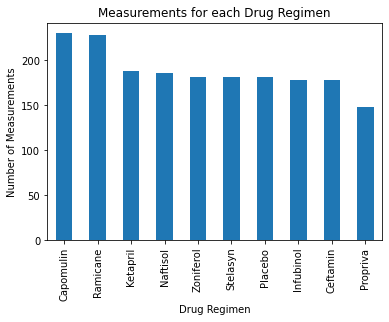

In [69]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
pandas_drug_plot = drug_data.plot(kind='bar',title='Measurements for each Drug Regimen')
pandas_drug_plot.set_ylabel('Number of Measurements')
plt.show()

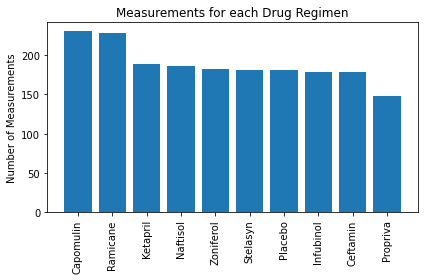

In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.bar(drug_data.index, drug_data.values)
plt.ylabel('Number of Measurements')
plt.title('Measurements for each Drug Regimen')
plt.xticks(rotation=90)
plt.tight_layout()
fig = plt.gcf()
fig.savefig('../../images/measurements_regimen.png')
plt.show()

In [71]:
# Generate the data for the distibution by sex
# TODO Make output nice
sex_data = clean_mice_data.groupby('Sex')['Mouse ID'].nunique()
sex_df = sex_data.to_frame()
sex_df

,Mouse ID
Sex,
Female,123
Male,125


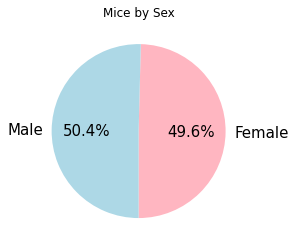

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# TODO Make Title size 15
colors = ['lightpink', 'lightblue']
pandas_sex_plot = sex_data.plot(kind='pie',title='Mice by Sex',autopct='%1.1f%%', startangle=270, fontsize=15, colors = colors)
pandas_sex_plot.set_ylabel('')
plt.show()

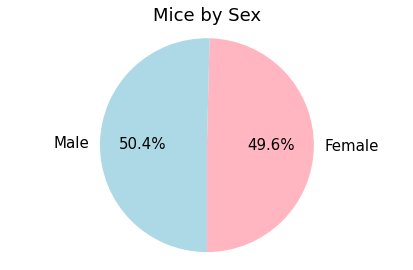

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.rcParams['font.size'] = 15
plt.pie(sex_data.values, labels=sex_data.index, autopct="%1.1f%%", shadow=False, startangle=270, colors=colors)
plt.axis("equal")
plt.title('Mice by Sex')
plt.tight_layout()
fig = plt.gcf()
fig.savefig('../../images/mice_gender.png')
plt.show()

## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin",]

sorted_mice_data = clean_mice_data.sort_values(["Timepoint"], ascending=True)

# Tumor volumes at last timepoint for every drug
regimen_data = sorted_mice_data[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
regimen_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1226,Propriva,n678,0,45.000000
1229,Placebo,n763,0,45.000000
341,Capomulin,v923,0,45.000000
338,Capomulin,w150,0,45.000000
...,...,...,...,...
1162,Ceftamin,l733,45,64.299830
1763,Stelasyn,x402,45,61.619606
59,Ramicane,s508,45,30.276232
360,Capomulin,g316,45,40.159220


In [75]:
# Show statistical data for the 4 drugs requested
for drug in drug_list:
    print(get_drug_stats(drug))

-------------------------
Statistical data for Capomulin
	IQR = 7.78
	Lower Quartile = 32.38
	Upper Quartile = 40.16
	Lower Bound: 20.70
	Upper Bound: 51.83
	Capomulin potential outliers could be values below 20.70 and above 51.83 
-------------------------

-------------------------
Statistical data for Ramicane
	IQR = 9.10
	Lower Quartile = 31.56
	Upper Quartile = 40.66
	Lower Bound: 17.91
	Upper Bound: 54.31
	Ramicane potential outliers could be values below 17.91 and above 54.31 
-------------------------

-------------------------
Statistical data for Infubinol
	IQR = 11.48
	Lower Quartile = 54.05
	Upper Quartile = 65.53
	Lower Bound: 36.83
	Upper Bound: 82.74
	Infubinol potential outliers could be values below 36.83 and above 82.74 
-------------------------

-------------------------
Statistical data for Ceftamin
	IQR = 15.58
	Lower Quartile = 48.72
	Upper Quartile = 64.30
	Lower Bound: 25.36
	Upper Bound: 87.67
	Ceftamin potential outliers could be values below 25.36 and above 

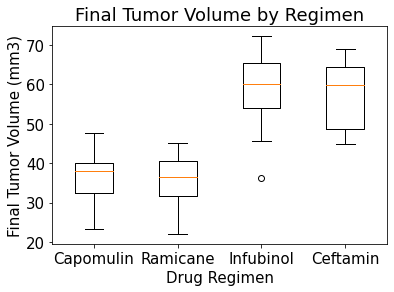

In [76]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_plot = []
for drug in drug_list:
    treatment_plot.append(get_drug_tumor_data(drug))
    
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(treatment_plot, labels=drug_list)
fig = plt.gcf()
fig.savefig('../../images/tumor_vol_regimen.png')
plt.show()

## Line and Scatter Plots

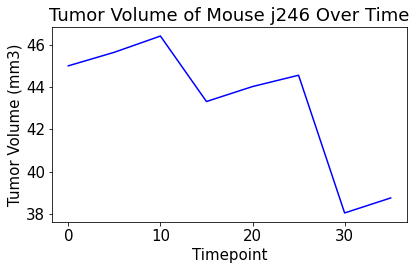

In [77]:
# Generate a line plot of tumor volume vs. time point for a random mouse treated with Capomulin
# Using a seed of 42 for reporducability ... DON'T PANIC
drug_regimen = "Capomulin"
mouse_id = get_drug_data(drug_regimen).sample(random_state=42)["Mouse ID"].iloc[0]
line_plot_data = clean_mice_data.loc[(clean_mice_data["Mouse ID"] == mouse_id)]
line_plot_data = line_plot_data.set_index("Timepoint")

#Final plot
line_plot_data["Tumor Volume (mm3)"].plot(color = "blue")
plt.title(f"Tumor Volume of Mouse {mouse_id} Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.tight_layout()

fig = plt.gcf()
fig.savefig('../../images/overtime_regimen.png')
plt.show()

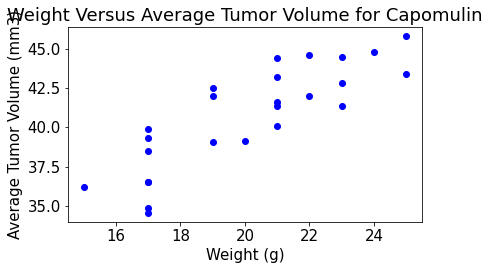

In [78]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot_data = clean_mice_data.loc[(clean_mice_data["Drug Regimen"] == drug_regimen)]
scatter_plot_data = scatter_plot_data.groupby(["Mouse ID"]).mean()

# set x and y value
weight_data = scatter_plot_data["Weight (g)"]
volume_data = scatter_plot_data["Tumor Volume (mm3)"]

# Plot the graph
plt.scatter(weight_data, volume_data, color = "blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f"Weight Versus Average Tumor Volume for {drug_regimen}")
plt.tight_layout()

fig = plt.gcf()
fig.savefig('../../images/wgt_vol.png')
plt.show()

## Correlation and Regression

In [79]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr_coeff = st.pearsonr(weight_data, volume_data)[0]
print(f'The correlation coefficient between weight and tumor volume is {corr_coeff:.2f}')

# Linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(weight_data, volume_data)

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R Value: {r_value}")
print(f"P value: {p_value}")
print(f"Standard Error: {std_err}")     

The correlation coefficient between weight and tumor volume is 0.84
Slope: 0.9544396890241045
Intercept: 21.552160532685015
R Value: 0.8419363424694718
P value: 1.3225722434712642e-07
Standard Error: 0.1275435903320134


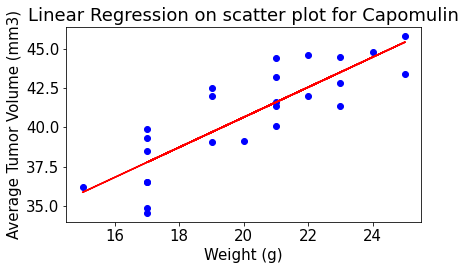

In [80]:
#using prior computing data to plot the regression line on the scatter plot
plt.scatter(weight_data, volume_data, color = "blue")
plt.plot(weight_data, slope * weight_data + intercept, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title(f"Linear Regression on scatter plot for {drug_regimen}")
plt.tight_layout()

fig = plt.gcf()
fig.savefig('../../images/linreg_capomulin.png')
plt.show()

## Observations and Inferences
Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

1. Out of all the regimens of interest Capomulin and Ramicane showed the best decrease of tumor volume over the course.
2. With Capomulin there is a decrease of weight with the decrease of tumor volume.
3. Infubinol was the only regimen with a significant outlier.
4. The two regimens that were most effective also had the most data points (mice) in the study.

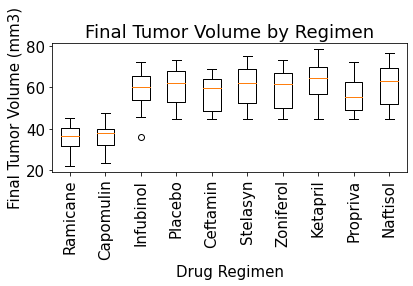

In [81]:
# For giggles wanted to see the box wisker plot for all drugs
treatment_plot = []
drug_list_tot = clean_mice_data["Drug Regimen"].unique()
for drug in drug_list_tot:
    treatment_plot.append(get_drug_tumor_data(drug))
    
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(treatment_plot, labels=drug_list_tot)
plt.xticks(rotation=90)
plt.tight_layout()

fig = plt.gcf()
fig.savefig('../../images/final_vol_regimen.png')
plt.show()